In [1]:
import numpy as np
import numpy.linalg as lyn
import random
import urllib.request as urlreq
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#Get the Bills Voted On
url = 'https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_107_1.htm'
req = urlreq.Request(url)
resp = urlreq.urlopen(req)
respData = resp.read()
leader='https://www.senate.gov/l'
listoflinks=[]
data = re.findall(r'<tr(.*?)/tr>',str(respData))
c=0
for d in data:
    if("A bill" in d):
        l=re.findall(r'/l(.*?)>',str(d))
        listoflinks.append(leader+str(l)[2:-3])
        c+=1
print(listoflinks[1])
#output = open('tester.txt','w')
#output.write(str(respData))
#output.close()

https://www.senate.gov/legislative/LIS/roll_call_lists/roll_call_vote_cfm.cfm?congress=107&session=1&vote=00378


In [6]:
def mySort(a):
    if(a=='Yea'):
        return 1
    if(a=='Nay'):
        return -1
    return 0

In [11]:
headers={}
headers['User-Agent'] = 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'
A=np.zeros((100,len(listoflinks)))
c=0
n=0
bads=[]
for links in listoflinks:
    print("h")
    url2 = links
    req2 = urlreq.Request(url2, headers=headers)
    resp2 = urlreq.urlopen(req2)
    respData2 = resp2.read()
    data2 = re.findall(r'<span(.*?)/span>',str(respData2))
    c=0
    reldat=""
    for d in data2:
        if("Akaka" in str(d)):
            if(c==0):
                reldat=str(d)
            c+=1
    votes = re.findall(r'<b>(.*?)</b>',reldat)
    v=list(map(mySort,votes))
    myVotes=np.asarray(v)
    if(myVotes.shape[0]==100):
        A[:,n]=myVotes
    else:
        bads.append(n)
    n+=1

A=np.delete(A,bads,1)

h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h
h


In [12]:
np.savetxt("2001VoteMatrix",A)

In [13]:
print(A)

[[ 0.  0.  0. ...  1.  1.  1.]
 [ 1. -1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 ...
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1. -1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]]


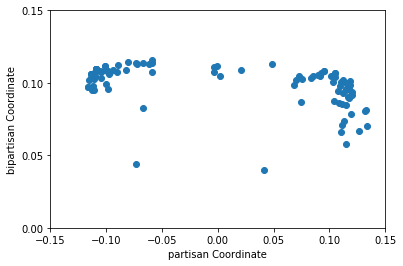

In [15]:
U,s,V=np.linalg.svd(A, full_matrices=False)
plt.scatter(U[:,1],-U[:,0])

plt.xlabel('partisan Coordinate')

plt.ylabel('bipartisan Coordinate')

plt.xlim([-0.15,0.15])

plt.ylim([0,0.15])

plt.yticks([0, 0.05, 0.1, 0.15]);

[0.20584426 0.13660076]


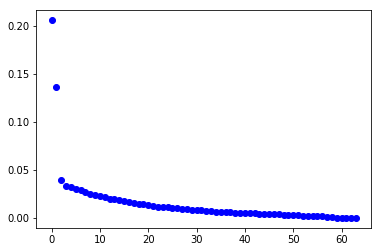

In [16]:
plt.plot(s/s.sum(),'bo');

print(s[:2]/s.sum())